In [1]:
%load_ext autoreload

from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from AbstractArchitecture import AbstractArchitecture
from DenseEncoder import DenseEncoder
from DenseDecoder import DenseDecoder
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE
from plot_model_prediction import plot_model_prediction

In [ ]:
## Craig -- It may be best to actually save the model parameters in the following cell into a different file
## This would make reconstruction (and loading) a little easier

In [2]:
# Set layer sizes
n = 128
l = 20

# Specify options for constructing encoders and decoders
activation = "relu"
initializer = "he_normal"
regularizer = None
encoder_layers = 3
decoder_layers = 4
add_identity = True
train_autoencoders_only = False

# Collect all the options
act_layer = dict(activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer)
lin_layer = dict(activation=None, kernel_initializer=initializer, kernel_regularizer=regularizer)

encoder_config = {'units_full': n,
                  'num_layers': encoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

decoder_config = {'units_full': n,
                  'num_layers': decoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

# Set model architecture options
architecture_opts = {"units_latent": l,
                     "u_encoder_block": DenseEncoder(**encoder_config),
                     "u_decoder_block": DenseDecoder(**decoder_config),
                     "F_encoder_block": DenseEncoder(**encoder_config),
                     "F_decoder_block": DenseDecoder(**decoder_config),
                     "train_autoencoders_only": train_autoencoders_only
                     }

# Instantiate model object
model = AbstractArchitecture(**architecture_opts)

In [4]:
# Load the weights
model.load_weights("./data/subclass_demo_weights.tf")

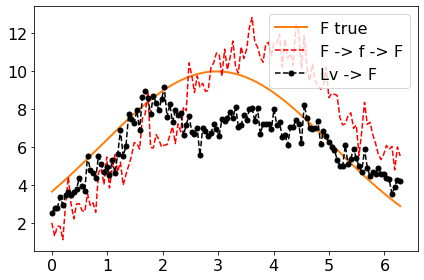

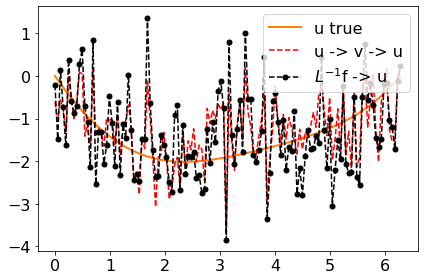

In [6]:
data_name = 'NLSL_expt1'  ## FILL IN HERE (from file name)
data_folder = './data/'

# data is num_steps x num_examples x n
data_train_u = np.load(data_folder + "{}_train1_u.npy".format(data_name))
data_train_f = np.load(data_folder + "{}_train1_f.npy".format(data_name))

# data is num_steps x num_examples x n
data_val_u = np.load(data_folder + "{}_val_u.npy".format(data_name))
data_val_f = np.load(data_folder + "{}_val_f.npy".format(data_name))

# data is num_steps x num_examples x n
data_test_u1 = np.load(data_folder + "{}_test1_u.npy".format(data_name))
data_test_f1 = np.load(data_folder + "{}_test1_f.npy".format(data_name))

data_test_u = np.load(data_folder + "{}_test2_u.npy".format(data_name))
data_test_f = np.load(data_folder + "{}_test2_f.npy".format(data_name))


plot_model_prediction(model, 40, data_val_u, data_val_f)

In [7]:
# Now say you want to continue training the model, after you load it

## Set optimizer
optimizer = keras.optimizers.Adam
optimizer_opts = dict(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, amsgrad=False)

## Set loss function(s) to use:
loss_fn = NMSE
loss_fn_options = {}

# Callback functions
cbs = [keras.callbacks.EarlyStopping(patience=10)]

# Fit method options
fit_options = dict(batch_size = 64, epochs = 50)

# Depending on whether you're training just the autoencoders, set te loss functions
if train_autoencoders_only:
    loss_fns = 2*[loss_fn(**loss_fn_options)]
    val_data = [(data_val_u, data_val_f), 
                (data_val_u, data_val_f)]
else:
    loss_fns = 4*[loss_fn(**loss_fn_options)]
    val_data = [(data_val_u, data_val_f), 
                (data_val_u, data_val_f, data_val_f, data_val_u)]

In [9]:
%%time

# Compile the model
model.compile(loss=loss_fns, optimizer=optimizer(**optimizer_opts))

# And continue training!
hist = model.fit(x=[data_train_u, data_train_f], 
                 y=[data_train_u, data_train_f, data_train_f, data_train_u], 
                 validation_data=val_data,
                 #callbacks=cbs,
                 **fit_options)

Train on 8906 samples, validate on 2227 samples
Epoch 1/50
8906/8906 [==============================] - 2s 206us/sample - loss: 1.5781 - output_1_loss: 0.1353 - output_2_loss: 0.0662 - output_3_loss: 0.0375 - output_4_loss: 1.2555 - val_loss: 2.3315 - val_output_1_loss: 0.0805 - val_output_2_loss: 0.0421 - val_output_3_loss: 0.0391 - val_output_4_loss: 2.1117
Epoch 2/50
8906/8906 [==============================] - 1s 59us/sample - loss: 1.7670 - output_1_loss: 0.1256 - output_2_loss: 0.0637 - output_3_loss: 0.0354 - output_4_loss: 1.4604 - val_loss: 4.9559 - val_output_1_loss: 0.1142 - val_output_2_loss: 0.0625 - val_output_3_loss: 0.0409 - val_output_4_loss: 4.6855
Epoch 3/50
8906/8906 [==============================] - 1s 60us/sample - loss: 2.5680 - output_1_loss: 0.1925 - output_2_loss: 0.0805 - output_3_loss: 0.0409 - output_4_loss: 2.1605 - val_loss: 1.6671 - val_output_1_loss: 0.0834 - val_output_2_loss: 0.0431 - val_output_3_loss: 0.0362 - val_output_4_loss: 1.4467
Epoch 4/50
8

Epoch 27/50
8906/8906 [==============================] - 1s 56us/sample - loss: 0.1370 - output_1_loss: 0.0132 - output_2_loss: 0.0119 - output_3_loss: 0.0186 - output_4_loss: 0.0639 - val_loss: 0.1803 - val_output_1_loss: 0.0138 - val_output_2_loss: 0.0172 - val_output_3_loss: 0.0216 - val_output_4_loss: 0.0924
Epoch 28/50
8906/8906 [==============================] - 1s 56us/sample - loss: 0.1281 - output_1_loss: 0.0115 - output_2_loss: 0.0114 - output_3_loss: 0.0178 - output_4_loss: 0.0604 - val_loss: 0.1877 - val_output_1_loss: 0.0107 - val_output_2_loss: 0.0164 - val_output_3_loss: 0.0208 - val_output_4_loss: 0.1062
Epoch 29/50
8906/8906 [==============================] - 1s 56us/sample - loss: 0.1391 - output_1_loss: 0.0127 - output_2_loss: 0.0112 - output_3_loss: 0.0173 - output_4_loss: 0.0708 - val_loss: 0.2049 - val_output_1_loss: 0.0097 - val_output_2_loss: 0.0161 - val_output_3_loss: 0.0198 - val_output_4_loss: 0.1277
Epoch 30/50
8906/8906 [==============================] - 1

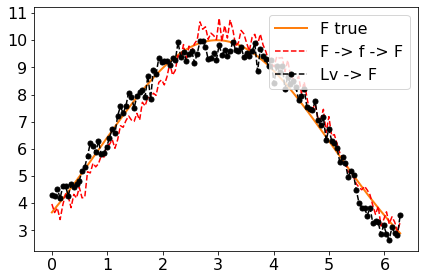

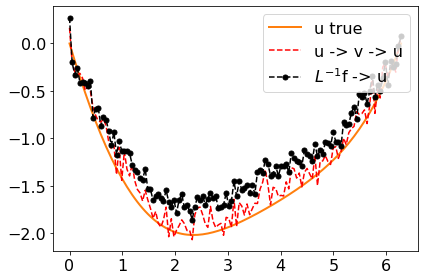

In [10]:
# Did the result improve?
plot_model_prediction(model, 40, data_val_u, data_val_f)